In [1]:
%matplotlib inline
import numpy as np
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")
matplotlib.style.use("dark_background")

# Sample data
Let's suppose that we have taken some data, saved at `xvals` and `yvals`. Let's fir just take a look at it.

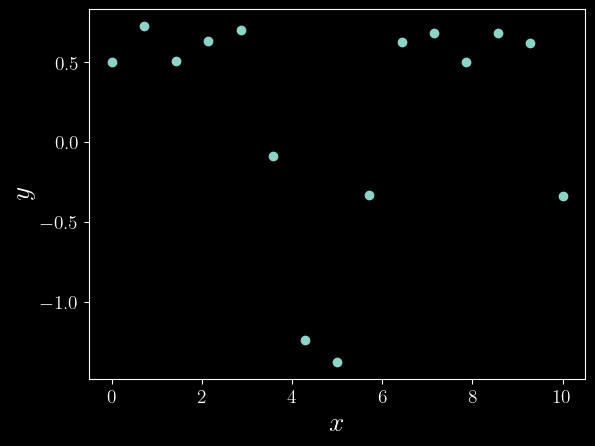

In [3]:
xvals = np.linspace(0, 10, num=15)
yvals = np.sin(xvals) + 0.5 * np.cos(2 * xvals)

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, yvals, linestyle="", marker="o")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("sample_data.pdf", bbox_inches="tight", transparent=True)

# Polynomial Interpolation
We're first going to fit our data by building an $n$-th order polynomial for $n + 1$ points. This is guaranteed to fit all of our points, and it has nice properites like being very smooth (put a different way, it has a smoothness class of $C^\infty$).

Let's write out our polynomial for an $n$-th degree function:
$$
f(x) = w_0 + w_1 x + w_2 x^2 + \cdots + w_n x^n
$$
I want to fit my weights $w_i$ such that they exactly go through the points specified. I have $n+1$ points, and $n+1$ constraints, so this is a perfectly determined system.

I can set this up as a matrix equation:
$$
X w = y,
$$
where $X$ is my series of $x$-points:
$$
X =
\begin{pmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^n \\
1 & x_1 & x_1^2 & \cdots & x_1^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^2
\end{pmatrix},
$$
$w$ is a vector of weights:
$$
w =
\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_n
\end{pmatrix},
$$
and $y$ is my series of $y$-points:
$$
y =
\begin{pmatrix}
y_0 \\
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}.
$$
To solve for my weights $w$, I can apply the inverse matrix $X^{-1}$ to both sides:
$$
w = X^{-1} y.
$$
We're going to implement this numerically for our above series of points.

In [4]:
print(xvals)

[ 0.          0.71428571  1.42857143  2.14285714  2.85714286  3.57142857
  4.28571429  5.          5.71428571  6.42857143  7.14285714  7.85714286
  8.57142857  9.28571429 10.        ]


In [5]:
# list comprehension
mylist = [i for i in range(10)]

In [6]:
print(mylist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
print(type(mylist))

<class 'list'>


In [8]:
# let's fit our polynomial
X = np.zeros((len(xvals), len(xvals)), dtype=np.float64)
for i, xval in enumerate(xvals):
    row = np.asarray([xval**(n) for n in range(len(xvals))])
    print("row: ", row)
    X[i, :] = row
    print("matrix so far: ", X)

row:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
matrix so far:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
row:  [1.         0.71428571 0.51020408 0.36443149 0.2603082  0.18593443
 0.13281031 0.09486451 0.06776036 0.04840026 0.03457161 0.02469401
 0.01763858 0.01259898 0.00899927]
matrix so far:  [[1.         0.    

In [9]:
X[2, 1]

1.4285714285714286

In [10]:
# what does my matrix look like?
print(X)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.14285714e-01 5.10204082e-01 3.64431487e-01
  2.60308205e-01 1.85934432e-01 1.32810309e-01 9.48645062e-02
  6.77603615e-02 4.84002582e-02 3.45716130e-02 2.46940093e-02
  1.76385781e-02 1.25989843e-02 8.99927453e-03]
 [1.00000000e+00 1.42857143e+00 2.04081633e+00 2.91545190e+00
  4.16493128e+00 5.94990183e+00 8.49985975e+00 1.21426568e+01
  1.73466526e+01 2.47809322e+01 3.54013317e+01 5.05733311e+01
  7.22476158e+01 1.03210880e+02 1.47444114e+02]
 [1.00000000e+00 2.14285714e+00 4.59183673e+00 9.83965015e+00
  2.10849646e+01 4.51820670e+01 9.68187150e+01 2.07468675e+02
  4.44575732e+02 9.52662283e+02 2.04141918e+03 4.37446967e+03
  9.37386357e+03 2.00868505e+04 4.30432511e+04]
 [1.00000000e+00 2.85714286e+00 8.16326531e+00 2.33236152e+01
  

## Solving for the weights
Now we're going to solve for the weights by inverting our matrix, and dotting it into our $y$-values.

In [11]:
# solve for the weights 
wvals = np.dot(np.linalg.inv(X), yvals)

In [12]:
print(wvals)

[ 5.00000000e-01  8.10019632e-01  1.47272928e-01 -3.08864611e+00
  4.50692430e+00 -3.75308601e+00  2.23195425e+00 -9.57061805e-01
  2.86474447e-01 -5.88348216e-02  8.20938561e-03 -7.63827376e-04
  4.53621374e-05 -1.55625975e-06  2.34868653e-08]


## Using our interpolated function
Now we want to use our interpolated function. We have 15 points, so we're using a 14-th order polynomial. The weights $w_i$ are the coefficients for $x$ of that order.

Rather than explicitly write this out for all 14 terms, we're going to be a little more flexible in how we're implementing it. We also want to be able to handle cases of passing in both a single number, and a series of points to interpolate. That's what we've done in the funciton below.

In [13]:
def poly_interp(x, wvals):
    """
    Apply a polynomial interpolation to the values of x given weights wvals.

    Parameters
    ----------
    x : float or 1d array of float
        The points at which to evaluate our polynomial function.
    wvals : 1d array of float
        The weights of the polynomial function. If the array is `n` points long,
        it corresponds to a polynomial of degree `n - 1`.

    Returns
    -------
    float or 1d array of float
        The value of the function at the x points specified.
    """
    if type(x) is not np.ndarray:
        x = np.asarray(x)
    return np.sum(
        np.asarray(
            [wvals[i] * x**i for i in range(len(wvals))]
        ),
        axis=0
    )

In [14]:
x = np.array([1, 2, 3])
print(x**2)

[1 4 9]


In [15]:
myarray = np.asarray([wvals[i] * x**i for i in range(len(wvals))])
print(myarray.shape)

(15, 3)


In [16]:
poly_interp(0.5, wvals)

0.7485551394299862

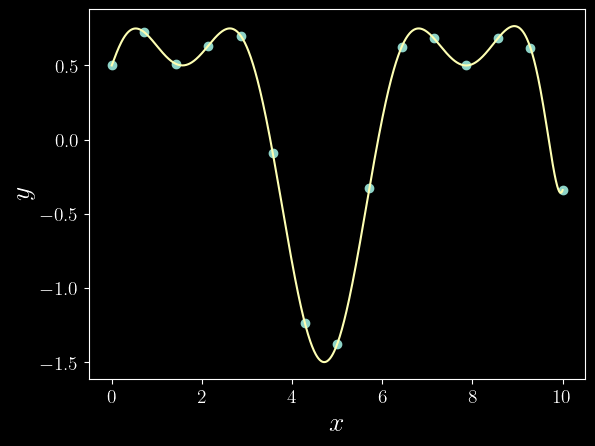

In [17]:
xinterp = np.linspace(0, 10, num=1000)
yinterp = poly_interp(xinterp, wvals)

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, yvals, linestyle="", marker="o")
ax.plot(xinterp, yinterp, linestyle="-", marker="")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("poly_interp.pdf", bbox_inches="tight", transparent=True)

## Beware extrapolation
Let's see what happens if we start to extrapolate past the edge of our defined region:

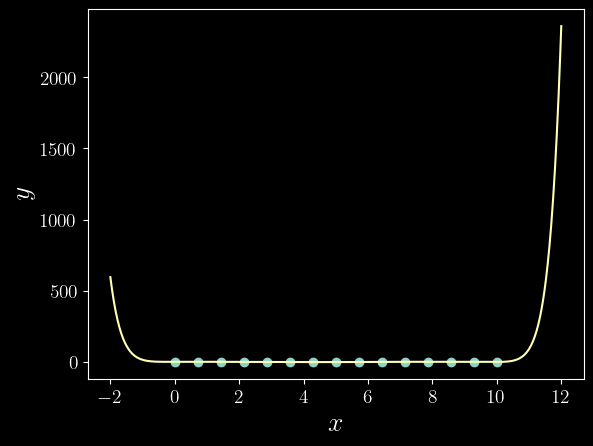

In [18]:
xinterp = np.linspace(-2, 12, num=1000)
yinterp = poly_interp(xinterp, wvals)

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, yvals, linestyle="", marker="o")
ax.plot(xinterp, yinterp, linestyle="-", marker="")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("poly_extrapolate.pdf", bbox_inches="tight", transparent=True)

## Using built-in NumPy functions
NumPy has a built-in function `numpy.polynomial.polynomial.Polynomial.fit`, which accomplishes the same task as our home-grown code above. In general, it's more efficient to use the Python library functions, but it's always good to know what the code is doing behind the scenes!

In [19]:
polyfit = np.polynomial.polynomial.Polynomial.fit(xvals, yvals, 14)

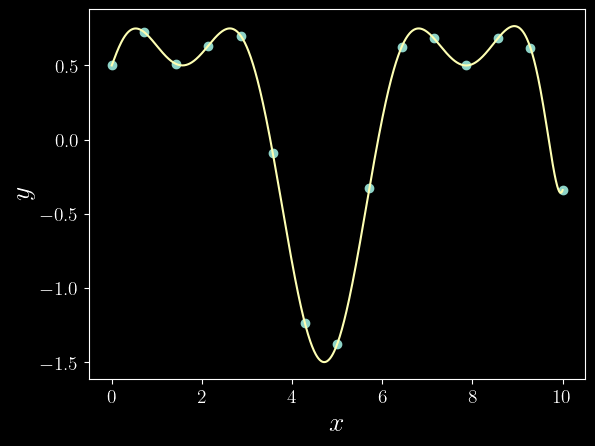

In [20]:
xinterp = np.linspace(0., 10, num=1000)
yinterp = polyfit(xinterp)

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, yvals, linestyle="", marker="o")
ax.plot(xinterp, yinterp, linestyle="-", marker="")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

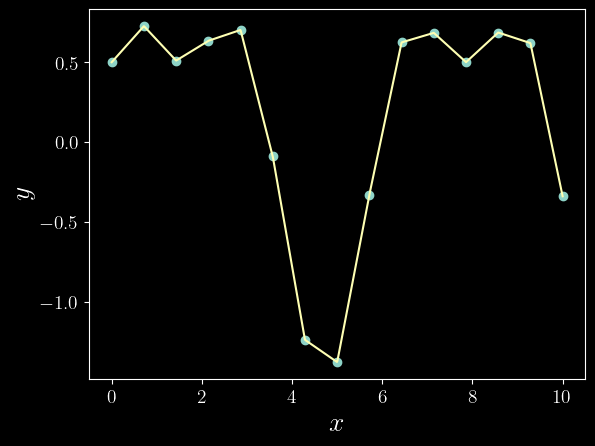

In [21]:
xinterp = np.linspace(0, 10, num=1000)
yinterp = np.interp(xinterp, xvals, yvals)

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, yvals, linestyle="", marker="o")
ax.plot(xinterp, yinterp, linestyle="-", marker="")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("linterp.pdf", bbox_inches="tight", transparent=True)

# In-Class Activity

In [22]:
def fit_line(xvals, yvals):
    mvals = np.empty(len(xvals) - 1)
    bvals = np.empty(len(yvals) - 1)
    for i in range(len(xvals) - 1):
        dx = xvals[i + 1] - xvals[i]
        dy = yvals[i + 1] - yvals[i]
        mvals[i] = dy / dx
        bvals[i] = yvals[i] - mvals[i] * xvals[i]
        
    return mvals, bvals

In [23]:
mvals, bvals = fit_line(xvals, yvals)

In [24]:
def interpolate_line(xx, xvals, yvals, mvals, bvals):
    idx = np.amax(np.argwhere(xvals - xx < 0))
    m = mvals[idx]
    b = bvals[idx]
    return m * xx + b

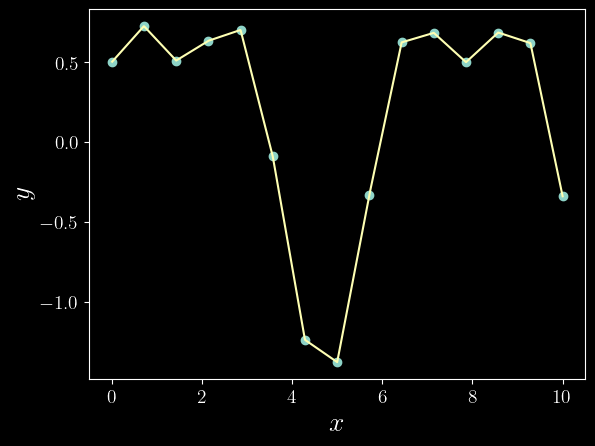

In [25]:
xinterp = np.linspace(0.01, 10, num=1000)
yinterp = np.array([interpolate_line(x, xvals, yvals, mvals, bvals) for x in xinterp])

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, yvals, linestyle="", marker="o")
ax.plot(xinterp, yinterp, linestyle="-", marker="")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("linterp_v2.pdf", bbox_inches="tight", transparent=True)